# Lending Club: predicing creditworthiness

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
# import raw data

df_raw = pd.read_csv('C:\\Users\sonja tilly.ABERDEEN\\LendingClub.csv', low_memory=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 21 columns):
Loan Amount                          24776 non-null int64
Loan Term                            24776 non-null object
Employment Length                    24776 non-null float64
Home Ownership                       24776 non-null object
Annual Income                        24776 non-null float64
Loan Purpose                         24776 non-null object
Address State                        24775 non-null object
Debt To Income Ratio                 24775 non-null float64
No. Delinquencies In Last 2 Years    24775 non-null object
Earliest Credit Line Opened          24776 non-null float64
FICO Credit Score                    24775 non-null float64
No. Inquiries In Last 6 Months       24775 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24775 non-null float64
No. Adverse Public Records           24775 non-null object
T

The dataset contains a mix of datatypes. 
The objects need to be converted into numerical values. 
The feature 'Class' will be the target and its values will be converted in '0' and '1'.

## Exploratory Data Analysis

In [6]:
# let's have a look at the target variable.

count = df_raw['Class'].value_counts()
count

Creditworthy      20274
Uncreditworthy     4502
Name: Class, dtype: int64

In [7]:
# convert 'Class' feature (=target) into numerical values

def credit_worthiness(status):
    if status == 'Creditworthy':
        return 0
    elif status == 'Uncreditworthy':
        return 1
    else:
        return status

df_raw['Class_new'] = df_raw['Class'].apply(credit_worthiness)


In [8]:
# calculate percentage
total = len(df_raw.index)
credit = df_raw['Class_new'].value_counts()

creditworthy = round((credit[0]/total)*100,2)
uncreditworthy = round((credit[1]/total)*100,2)
print(creditworthy)
print(uncreditworthy)

81.83
18.17


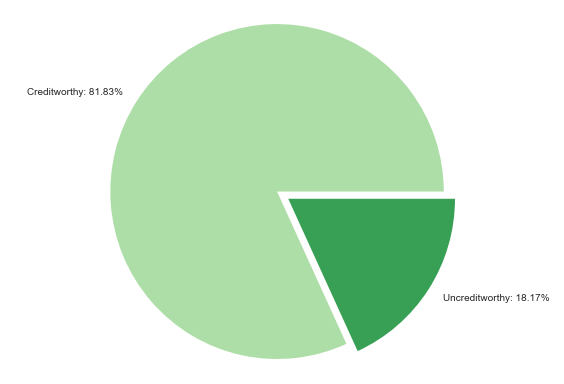

In [9]:
sums = df_raw.Class_new.groupby(df_raw.Class_new).value_counts()

colors = sns.color_palette("Greens", n_colors=2, desat=1)

explode=(0.04, 0.04)
plt.pie([count[0], count[1]], labels=['Creditworthy: 81.83%', 'Uncreditworthy: 18.17%'],\
       explode=explode, colors=colors)
plt.axis('equal')
plt.tight_layout()

The dataset is unbalanced, with uncreditworthy observations only accounting for 18.17%.

The unbalanced nature of the data will have to be considered when making predictions.

In [27]:
# what is the link between loan purpose and creditworthiness?

table = pd.pivot_table(df_raw, values='Loan Amount', index='Loan Purpose', \
                        columns='Class_new', aggfunc='count').fillna(0)
table.columns = ['good', 'bad']
table['Sum'] = table['good'] + table['bad']
table['percent_good'] = table['good']/table['Sum']*100
table['percent_bad'] = table['bad']/table['Sum']*100

table.drop(table.columns[[0, 1, 2]], axis=1, inplace=True)
table = table[1: :]


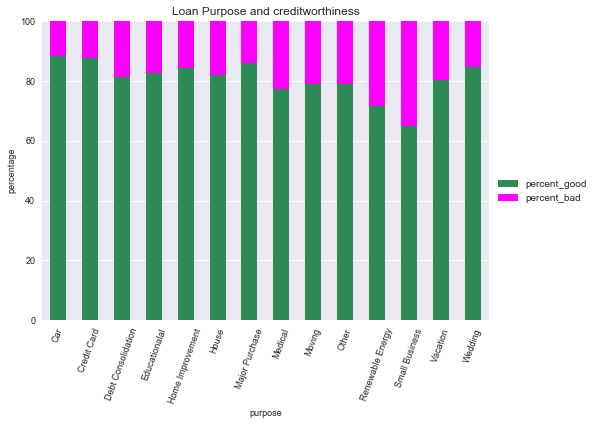

In [28]:
colors = ('seagreen','magenta')
ax= table.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Loan Purpose and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(table.index, rotation=70)
ax.set_xlabel('purpose', fontsize=9)
ax.set_ylabel('percentage', fontsize=9)

In [24]:
# what is the link between home ownership and creditworthiness?

table1 = pd.pivot_table(df_raw, values='Loan Amount', index='Home Ownership', \
                        columns='Class_new', aggfunc='count').fillna(0)
table1.columns = ['good', 'bad']
table1['Sum'] = table1['good'] + table1['bad']
table1['percent_good'] = table1['good']/table1['Sum']*100
table1['percent_bad'] = table1['bad']/table1['Sum']*100

table1.drop(table1.columns[[0, 1, 2]], axis=1, inplace=True)
table1 = table1.iloc[1: :]
table1

,percent_good,percent_bad
Home Ownership,,
NOne,100.000000,0.000000
OTHER,82.653061,17.346939
OWN,81.030213,18.969787
RENT,80.452830,19.547170


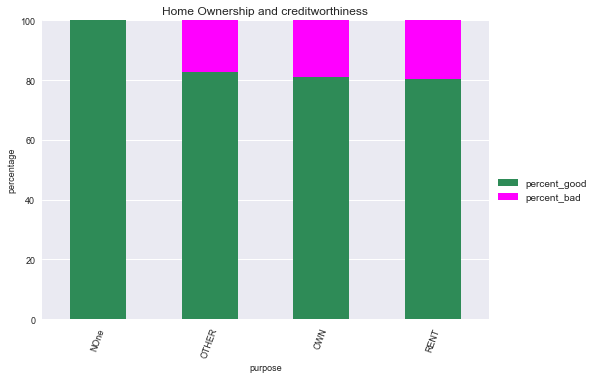

In [31]:
colors = ('seagreen','magenta')
ax1= table1.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Home Ownership and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax1.set_xticklabels(table1.index, rotation=70)
ax1.set_xlabel('purpose', fontsize=9)
ax1.set_ylabel('percentage', fontsize=9)

In [33]:
#How is loan performance related to address state?

table2 = pd.pivot_table(df_raw, values='Loan Amount', index='Address State', columns=['Class_new'], aggfunc='count').fillna(0)
table2.columns=[['good', 'bad']]
table2['Sum']=table2['good']+table2['bad']
table2['%good']=table2['good']/table2['Sum']*100
table2['%bad']=table2['bad']/table2['Sum']*100
table2.index = table2.index.astype(str)
table2['above mean'] = table2['%bad'] - table2['%bad'].mean()  
print(table2)

                 good    bad     Sum       %good       %bad  above mean
Address State                                                          
AK               49.0    8.0    57.0   85.964912  14.035088   -2.501998
AL              240.0   45.0   285.0   84.210526  15.789474   -0.747612
AR              132.0   18.0   150.0   88.000000  12.000000   -4.537086
AZ              487.0  112.0   599.0   81.302170  18.697830    2.160744
CA             3552.0  933.0  4485.0   79.197324  20.802676    4.265590
CO              431.0   81.0   512.0   84.179688  15.820312   -0.716773
CT              390.0   78.0   468.0   83.333333  16.666667    0.129581
DC              127.0   11.0   138.0   92.028986   7.971014   -8.566071
DE               61.0   11.0    72.0   84.722222  15.277778   -1.259308
FL             1328.0  413.0  1741.0   76.278001  23.721999    7.184913
GA              694.0  181.0   875.0   79.314286  20.685714    4.148629
HI               89.0   21.0   110.0   80.909091  19.090909    2

In [37]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 'GGwvotqQmpBq2zCu1w46')

data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        autocolorscale = False,
        locations = table2.index,
        z = table2['%bad'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Portion of uncreditworthy loans (%)"))]

layout = dict(
        title = 'Uncreditworthy loans by state (%)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Son17/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [40]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 'GGwvotqQmpBq2zCu1w46')

data = [ dict(
        type='choropleth',
        colorscale = 'Greens',
        autocolorscale = False,
        locations = table2.index,
        z = table2['Sum'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Number of uncreditworthy loans"))]

layout = dict(
        title = 'Uncreditworthy loans by state in absolute numbers',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Son17/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


# Data preprocessing

In [41]:
# create dummy variables for categorical data

df_raw = pd.get_dummies(df_raw, columns=['Loan Term','Home Ownership', 'Loan Purpose', 'Address State'])

In [42]:
# encode remaining columns containing object data types

from sklearn import preprocessing 

cols = ['No. Delinquencies In Last 2 Years', 'No. Adverse Public Records',\
           'No. Of Public Record Bankruptcies']

le = preprocessing.LabelEncoder()

def labelencoder(input):
    if input == 'None':
        return 0
    elif input == 'One':
        return 1
    elif input == 'Two':
        return 2
    elif input == 'Three':
        return 3
    elif input == 'Four':
        return 4
    elif input == 'Five':
        return 5
    elif input == 'Six':
        return 6
    elif input == 'Seven':
        return 7
    elif input == 'Eight':
        return 8
    elif input == 'Nine':
        return 9
    else:
        return input

for c in cols:    
    df_raw[c] = df_raw[c].apply(labelencoder)


In [43]:
# drop redundant feature

df_raw.drop('Class', axis=1, inplace=True)

In [44]:
# let's have a look a the preprocessed data:

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 89 columns):
Loan Amount                          24776 non-null int64
Employment Length                    24776 non-null float64
Annual Income                        24776 non-null float64
Debt To Income Ratio                 24775 non-null float64
No. Delinquencies In Last 2 Years    24775 non-null float64
Earliest Credit Line Opened          24776 non-null float64
FICO Credit Score                    24775 non-null float64
No. Inquiries In Last 6 Months       24775 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24775 non-null float64
No. Adverse Public Records           24775 non-null float64
Total Credit Balance                 24775 non-null float64
Use Of Credit Line                   24724 non-null float64
Total Number Of Credit Lines         24775 non-null float64
Loan Application Description         24776 non-null int

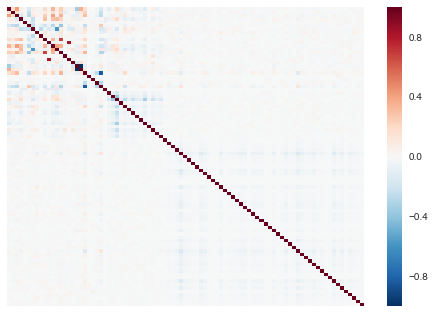

In [45]:
corr = df_raw.corr()
sns.heatmap(corr, xticklabels='', yticklabels='')

# Define X and y

In [46]:
df_raw.isnull().any()

Loan Amount                          False
Employment Length                    False
Annual Income                        False
Debt To Income Ratio                  True
No. Delinquencies In Last 2 Years     True
Earliest Credit Line Opened          False
FICO Credit Score                     True
No. Inquiries In Last 6 Months        True
Months Since Last Delinquency        False
No. Of Credit Lines                   True
No. Adverse Public Records            True
Total Credit Balance                  True
Use Of Credit Line                    True
Total Number Of Credit Lines          True
Loan Application Description         False
No. Of Public Record Bankruptcies    False
Class_new                            False
Loan Term_36 Months                  False
Loan Term_60 Months                  False
Home Ownership_MORTGAGE              False
Home Ownership_NOne                  False
Home Ownership_OTHER                 False
Home Ownership_OWN                   False
Home Owners

In [47]:
data = df_raw.fillna(df_raw.median())

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 89 columns):
Loan Amount                          24776 non-null int64
Employment Length                    24776 non-null float64
Annual Income                        24776 non-null float64
Debt To Income Ratio                 24776 non-null float64
No. Delinquencies In Last 2 Years    24776 non-null float64
Earliest Credit Line Opened          24776 non-null float64
FICO Credit Score                    24776 non-null float64
No. Inquiries In Last 6 Months       24776 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24776 non-null float64
No. Adverse Public Records           24776 non-null float64
Total Credit Balance                 24776 non-null float64
Use Of Credit Line                   24776 non-null float64
Total Number Of Credit Lines         24776 non-null float64
Loan Application Description         24776 non-null int

# Address collinearity

In [68]:
# Define X and y

y = data['Class_new']
y.columns = ['Class']
X = data.drop(['Class_new'], axis=1)


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_(d, thresh=5.0):
    variables = d.columns
    dropped=True
    while dropped:
        dropped=False
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(d[variables].values, i) for i in range(d[variables].shape[1])]
        vif["features"] = d[variables].columns
        v=vif[vif["VIF Factor"]>thresh]
        
        if len(v) > 0:
            maxloc = v.iloc[len(v)-1]['features']
            print('dropping \'' + maxloc) 
            variables=variables.drop(maxloc)
            dropped=True

    print('Remaining variables:')
    print(d.columns)
    return d[variables]

X_new = calculate_vif_(X, thresh=5.0)

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning:

divide by zero encountered in double_scalars



dropping 'Address State_WY
dropping 'Address State_WI
dropping 'Address State_TX
dropping 'Loan Purpose_Wedding
dropping 'Loan Purpose_Debt Consolidation
dropping 'Home Ownership_RENT
dropping 'Loan Term_60 Months
dropping 'Loan Term_36 Months
dropping 'Total Number Of Credit Lines
dropping 'Use Of Credit Line
dropping 'No. Of Credit Lines
dropping 'FICO Credit Score
dropping 'Earliest Credit Line Opened
dropping 'Annual Income
Remaining variables:
Index(['Loan Amount', 'Employment Length', 'Annual Income',
       'Debt To Income Ratio', 'No. Delinquencies In Last 2 Years',
       'Earliest Credit Line Opened', 'FICO Credit Score',
       'No. Inquiries In Last 6 Months', 'Months Since Last Delinquency',
       'No. Of Credit Lines', 'No. Adverse Public Records',
       'Total Credit Balance', 'Use Of Credit Line',
       'Total Number Of Credit Lines', 'Loan Application Description',
       'No. Of Public Record Bankruptcies', 'Loan Term_36 Months',
       'Loan Term_60 Months', 'Home

In [70]:
# train test split
# stratify target y as it may not be normally distributed

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42,\
                                                    stratify=y)

# Build model

In [71]:
# Build logistic regression model

from sklearn import linear_model
from sklearn.metrics import roc_auc_score

regr = linear_model.LogisticRegression(random_state=42, class_weight={0:0.1817, 1:0.8183})
regr.fit(X_train, y_train)

y_pred_regr = regr.predict(X_test)

In [72]:
# Assess benchmark model performance using area under the curve (AUC)

from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, y_pred_regr)
print("The AUC score for a simple Logistic Regression model is {:.4f}.".format(AUC))

The AUC score for a simple Logistic Regression model is 0.5977.


# Optimise model

In [85]:
# Tuning hyperparameters - logistic regression

from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1,0.2,0.3,0.4,0.5,0.6]}
             
gsregr = GridSearchCV(regr, param_grid)
    
gsregr.fit(X_train, y_train)

gsregr_pred = gsregr.predict(X_test)

AUC = roc_auc_score(y_test, gsregr_pred)
print("The AUC score for the optimized logistic regression model is {:.4f}.".format(AUC))

The AUC score for the optimized logistic regression model is 0.5950.


In [86]:
print(gsregr.best_params_)

{'C': 0.5}


In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='roc_auc')

scores_test = cross_val_score(regr, X_test, y_test, cv=5)
print(scores_test.mean())

0.604329873506


In [ ]:
# try XGBoost

import lightgbm as lgb 

trn_x=X_train
trn_y=y_train
val_x=X_test
val_y=y_test
train_data = lgb.Dataset(trn_x, trn_y) 
test_data = lgb.Dataset(val_x,val_y, reference=train_data) 

In [ ]:
# setting up parameters - 
# more details at https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.md

param = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # one class to predict
        'num_classes': 1,
        'metric': 'auc', 
        'max_depth': 10,
        'learning_rate': 0.01,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'num_thread':1,
        'bagging_freq': 5,
        'verbose': 0,
        'num_iterations':80, 
        'is_unbalance':True,
        'early_stopping_round':5 # stops if no improvement after 5 iterations
        }

num_round = 1000 # number of iterations

lgb.cv(param, train_data, num_round, nfold=5) # crossvalidates with 5 folds for selection
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data] )

In [ ]:
probs = bst.predict(val_x)
probs = pd.DataFrame(data=probs)
probs.columns = ['probabilities']
probs.head()

In [ ]:
# Get feature importances

print('Feature importances:', list(bst.feature_importance()))
feature_name = bst.feature_name()
feats['name'] = feature_name
featssorted = feats.sort_values(['feature importance'], ascending=False)

In [ ]:
# Plot feature importances

import seaborn as sns

sns.set(style='whitegrid')

f, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=featssorted['name'], y=featssorted['feature importance'])
ax.set(xlabel='feature names', ylabel='feature importance')
ax.set_title('Feature importances')
for item in ax.get_xticklabels():
    item.set_rotation(90)

# ROC curve

In [ ]:
from sklearn.metrics import roc_curve

probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_tests, preds)
AUC = roc_auc_score(y_test, y_pred_regr)

In [ ]:
preds2 = probs.iloc[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, preds2)

In [ ]:
sns.set_style("white")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'seagreen', label='AUC (benchmark model) = %0.4f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--', label='Random')
plt.legend(loc = 'lower right')
plt.plot(fpr2, tpr2, 'navy', label='AUC (final model) = 0.9871')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Confusion matrix

In [ ]:
cm = confusion_matrix(y_valid, preds_valid)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm, annot=True, fmt="d")